In [2]:
import random

import numpy as np
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms

In [3]:
lab = ["###############",
       "E             #",
       "# #### # ###  #",
       "# #### # ###  #",
       "# ###### # #  #",
       "# ####   # #  #",
       "# ######## ## #",
       "# ###      ## #",
       "#     ####### #",
       "#############S#"]

In [4]:
POP_SIZE = 100
INDV_SIZE = 200

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [6]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 4)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, INDV_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [7]:
def move(pos, command, y, x):
    new_pos = ""
    new_x = x
    new_y = y
    # esquerda
    if command == 1:
        new_x = x - 1
    # direita
    elif command == 2:
        new_x = x + 1
    # cima
    elif command == 3:
        new_y = y - 1
    # baixo
    elif command == 4:
        new_y = y + 1
    
    new_pos = lab[new_y][new_x]

    if new_pos == "#":
        return pos, y, x
    else:
        return new_pos, new_y, new_x


def evaluate(indv):
    passos = 0
    x = 0
    y = 1
    pos = lab[y][x]  # posicao E
    i = 0
    while pos != "S":
        pos, y, x = move(pos, indv[i], y, x)
        passos += 1
        i += 1
        if i >= INDV_SIZE:
            break

    return (passos,)


In [8]:
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=5)

In [9]:
pop = toolbox.population(n=500)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("passos", np.min)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.3, ngen=300, stats=stats, halloffame=hof, verbose=True)

gen	nevals	passos
0  	500   	124   
1  	331   	128   
2  	324   	111   
3  	347   	61    
4  	294   	61    
5  	340   	61    
6  	299   	61    
7  	314   	52    
8  	346   	52    
9  	323   	47    
10 	333   	47    
11 	342   	47    
12 	324   	43    
13 	314   	43    
14 	304   	41    
15 	339   	40    
16 	326   	39    
17 	316   	38    
18 	334   	38    
19 	323   	37    
20 	309   	36    
21 	302   	36    
22 	328   	36    
23 	315   	36    
24 	328   	36    
25 	330   	36    
26 	345   	36    
27 	337   	36    
28 	335   	33    
29 	334   	32    
30 	305   	32    
31 	329   	30    
32 	358   	30    
33 	321   	30    
34 	332   	30    
35 	341   	30    
36 	316   	30    
37 	307   	30    
38 	319   	30    
39 	331   	30    
40 	322   	30    
41 	321   	30    
42 	320   	30    
43 	327   	30    
44 	328   	30    
45 	316   	30    
46 	298   	30    
47 	341   	30    
48 	321   	30    
49 	336   	30    
50 	326   	30    
51 	332   	30    
52 	317   	30    
53 	337   	30    
54 	357   

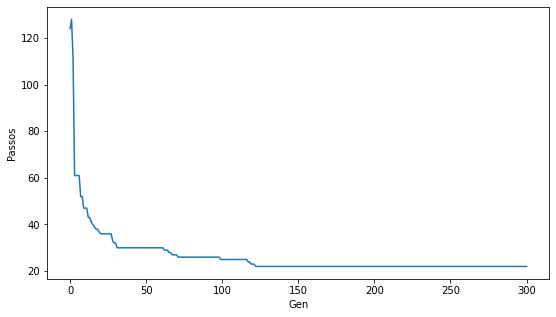

In [16]:
gen = log.select("gen")
fit_passos = log.select("passos")

plt.figure(figsize=(9, 5))
plt.xlabel("Gen")
plt.ylabel("Passos")
plt.plot(gen, fit_passos)

plt.show()